In [522]:
import numpy as np
import pandas as pd 
import mlfinlab as ml
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.offsets import BDay


# datetime.strptime("1996-11", "%Y-%m") + pd.offsets.BMonthEnd() #-1*BDay()

In [644]:
futures_prices_df = pd.read_csv('./data/CL.csv')
futures_prices_df['Dates'] = pd.to_datetime(futures_prices_df['Dates'])#, utc=True)
futures_prices_df.set_index('Dates', inplace=True)
# futures_prices_df.tz_convert('America/New_York')

working_df = futures_prices_df#[::-1]#['1994-02':]


In [631]:
working_df.tail(5)

,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_SETTLE
Dates,,,,,
2020-11-18,41.35,42.46,41.08,41.82,41.82
2020-11-19,41.61,41.98,41.08,41.74,41.74
2020-11-20,41.70,42.32,41.51,42.15,42.15
2020-11-23,42.46,43.36,42.29,43.06,43.06
2020-11-24,42.84,43.74,42.82,43.60,43.06


In [3]:
def flatten(li):
    """Flatten lists or tuples into their individual items. If those items are
    again lists or tuples, flatten those."""

    if isinstance(li, (list, tuple)):
        for item in li:
            yield from flatten(item)
    else:
        yield li

In [5]:
# working_df[working_df.index.day == 27] 

from pandas.tseries.offsets import MonthEnd


working_df['expiry'] = pd.to_datetime(working_df.index, format="%Y%m") + pd.offsets.BMonthEnd(0)
working_df

,contract_3,contract_1,contract_2,contract_4,expiry
date,,,,,
1994-02-01,0.485,0.456,0.478,0.490,1994-02-28
1994-02-02,0.486,0.463,0.481,0.490,1994-02-28
1994-02-03,0.482,0.460,0.476,0.485,1994-02-28
1994-02-04,0.477,0.456,0.471,0.480,1994-02-28
1994-02-07,0.472,0.442,0.465,0.476,1994-02-28
...,...,...,...,...,...
2006-12-22,NaN,1.623,NaN,NaN,2006-12-29
2006-12-26,NaN,1.572,NaN,NaN,2006-12-29
2006-12-27,NaN,1.588,NaN,NaN,2006-12-29


In [6]:
current_sec = []

current_contract = 2
for index in range(1, 3230):
    if (index % 21) == 0:
#         print(working_df.index[index].month)
        if current_contract == 5:
            current_contract = 1

        current_sec.append( ("contract_" + str(current_contract), )*21 )
        current_contract+=1
        
current_sec#.append( ("contract_2", )*17 )

# working_df['current_contract'] = list(flatten((current_sec)))

# current_sec

[('contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2',
  'contract_2'),
 ('contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3',
  'contract_3'),
 ('contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'contract_4',
  'con

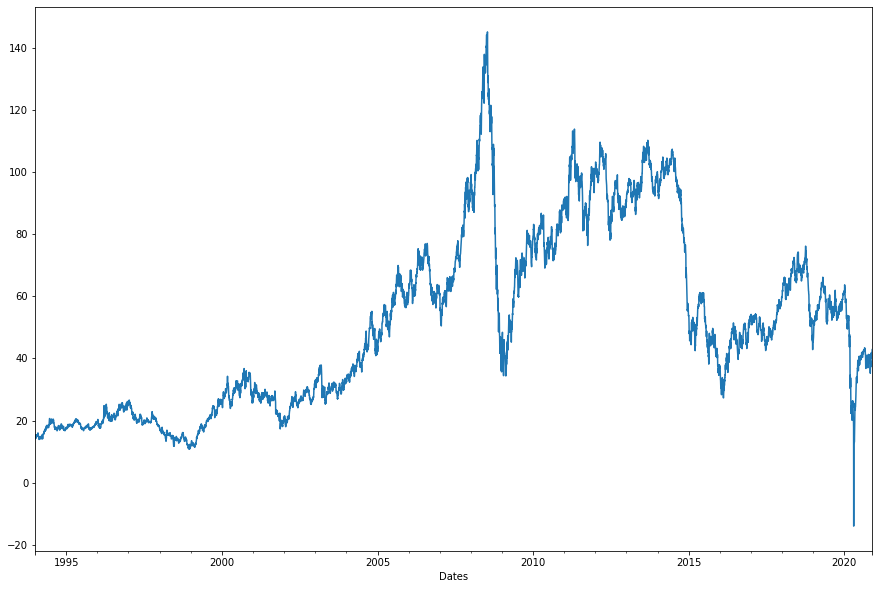

In [294]:
working_df['PX_OPEN'].plot(figsize=(15,10))

In [295]:
roll_dates = (pd.to_datetime(working_df.dropna().index, format="%Y%m") + pd.offsets.BMonthEnd()).drop_duplicates()[1:]
roll_dates

DatetimeIndex(['1994-02-28', '1994-03-31', '1994-04-29', '1994-05-31',
               '1994-06-30', '1994-07-29', '1994-08-31', '1994-09-30',
               '1994-10-31', '1994-11-30',
               ...
               '2020-02-28', '2020-03-31', '2020-04-30', '2020-05-29',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-30', '2020-11-30'],
              dtype='datetime64[ns]', name='Dates', length=322, freq=None)

In [329]:
!pip3 install bdateutil

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 259 kB 60 kB/s eta 0:00:01
     |████████████████████████████████| 114 kB 135 kB/s eta 0:00:01
     |████████████████████████████████| 45 kB 91 kB/s  eta 0:00:01
     |████████████████████████████████| 732 kB 145 kB/s eta 0:00:01
  Created wheel for bdateutil: filename=bdateutil-0.1-py3-none-any.whl size=8938 sha256=6aa7b74eaebe10f72643d0ed867a998368fe51b975989009e2f0689440b695a4
  Stored in directory: /home/aaron/.cache/pip/wheels/16/52/07/5c2dfd1e32914e51c50bce6f841f219bed855c5d754216d867
  Created wheel for python-dateutil: filename=python_dateutil-2.2-py3-none-any.whl size=226718 sha256=8ee4cb64b45da4af54cc0e5fd67f28fa768142ef464abdfb5bd9adf92dd3b762
  Stored in directory: /home/aaron/.cache/pip/wheels/4b/06/7b/d625663475e513e4335dac65082bda2addfc9e5d419c4cb1e3
  Created wheel for holidays: filename=holidays-0.10.3-py3-none-any.whl size=115855 sha256=18cf7cb55b2b7c5

In [697]:
from pandas import Timestamp

futures_prices_df.dropna(inplace=True)

## ASSUMING THE EXPIRATION IS THE LAST BUSINES DAY OF THE MONTH
# rollDates = futures_prices_df.loc[futures_prices_df.index.isin(futures_prices_df.index + pd.offsets.BMonthEnd())].dropna().index
# rollDates = (futures_prices_df.index + pd.offsets.BMonthEnd()).drop_duplicates()[:-1]

## ASSUMING THIS
# Trading terminates 3 business day prior to the 25th calendar day of the month prior to the contract
# month. If the 25th calendar day is not a business day, trading terminates 4 business days prior to 
# the 25th calendar day of the month prior to the contract month.
rollDates = futures_prices_df.index[futures_prices_df.index.day == 25]  #+ pd.offsets.BMonthEnd()).drop_duplicates()[:-1]

def is_business_day(date):
    return bool(len(pd.bdate_range(date, date)))

from bdateutil import isbday
import holidays

business_day = []
for roll_date in rollDates:
    business_day.append( isbday( str(roll_date), holidays = holidays.US() ) )



In [698]:
working_frame = pd.DataFrame(rollDates)
working_frame['business_day'] = business_day
working_frame['business_day'].value_counts()

True     204
False     26
Name: business_day, dtype: int64

In [699]:
futures_df_index = list(futures_prices_df.index)
roll_over_dates_for_non_holidays = [futures_df_index.index(i)-3 for i in working_frame[working_frame['business_day'] == True]['Dates'].values]

In [700]:

futures_prices_df.iloc[roll_over_dates_for_non_holidays].index.tolist()

[Timestamp('1994-01-20 00:00:00'),
 Timestamp('1994-02-22 00:00:00'),
 Timestamp('1994-03-22 00:00:00'),
 Timestamp('1994-04-20 00:00:00'),
 Timestamp('1994-05-20 00:00:00'),
 Timestamp('1994-07-20 00:00:00'),
 Timestamp('1994-08-22 00:00:00'),
 Timestamp('1994-10-20 00:00:00'),
 Timestamp('1994-11-22 00:00:00'),
 Timestamp('1995-01-20 00:00:00'),
 Timestamp('1995-04-20 00:00:00'),
 Timestamp('1995-05-22 00:00:00'),
 Timestamp('1995-07-20 00:00:00'),
 Timestamp('1995-08-22 00:00:00'),
 Timestamp('1995-09-20 00:00:00'),
 Timestamp('1995-10-20 00:00:00'),
 Timestamp('1996-01-22 00:00:00'),
 Timestamp('1996-03-20 00:00:00'),
 Timestamp('1996-04-22 00:00:00'),
 Timestamp('1996-06-20 00:00:00'),
 Timestamp('1996-07-22 00:00:00'),
 Timestamp('1996-09-20 00:00:00'),
 Timestamp('1996-10-22 00:00:00'),
 Timestamp('1996-11-20 00:00:00'),
 Timestamp('1997-02-20 00:00:00'),
 Timestamp('1997-03-20 00:00:00'),
 Timestamp('1997-04-22 00:00:00'),
 Timestamp('1997-06-20 00:00:00'),
 Timestamp('1997-07-

In [686]:
roll_over_dates_for_holidays = [futures_df_index.index(i)-3 for i in working_frame[working_frame['business_day'] == False]['Dates'].values]

futures_prices_df.iloc[roll_over_dates_for_holidays].index.tolist()

[Timestamp('1995-12-20 00:00:00'),
 Timestamp('1996-12-20 00:00:00'),
 Timestamp('1997-12-22 00:00:00'),
 Timestamp('1998-05-20 00:00:00'),
 Timestamp('1998-12-22 00:00:00'),
 Timestamp('1999-11-22 00:00:00'),
 Timestamp('2000-12-20 00:00:00'),
 Timestamp('2001-12-20 00:00:00'),
 Timestamp('2002-12-20 00:00:00'),
 Timestamp('2003-12-22 00:00:00'),
 Timestamp('2004-11-22 00:00:00'),
 Timestamp('2006-12-20 00:00:00'),
 Timestamp('2007-12-20 00:00:00'),
 Timestamp('2008-12-22 00:00:00'),
 Timestamp('2009-05-20 00:00:00'),
 Timestamp('2009-12-22 00:00:00'),
 Timestamp('2010-11-22 00:00:00'),
 Timestamp('2012-12-20 00:00:00'),
 Timestamp('2013-12-20 00:00:00'),
 Timestamp('2014-12-22 00:00:00'),
 Timestamp('2015-05-20 00:00:00'),
 Timestamp('2015-12-22 00:00:00'),
 Timestamp('2017-12-20 00:00:00'),
 Timestamp('2018-12-20 00:00:00'),
 Timestamp('2019-12-20 00:00:00'),
 Timestamp('2020-05-20 00:00:00')]

In [687]:
rollOverDates = futures_prices_df.iloc[roll_over_dates_for_holidays].index.tolist() + futures_prices_df.iloc[roll_over_dates_for_non_holidays].index.tolist()

In [688]:
rollOverDates.sort()
rollOverDates

[Timestamp('1994-01-21 00:00:00'),
 Timestamp('1994-02-23 00:00:00'),
 Timestamp('1994-03-23 00:00:00'),
 Timestamp('1994-04-21 00:00:00'),
 Timestamp('1994-05-23 00:00:00'),
 Timestamp('1994-07-21 00:00:00'),
 Timestamp('1994-08-23 00:00:00'),
 Timestamp('1994-10-21 00:00:00'),
 Timestamp('1994-11-23 00:00:00'),
 Timestamp('1995-01-23 00:00:00'),
 Timestamp('1995-04-21 00:00:00'),
 Timestamp('1995-05-23 00:00:00'),
 Timestamp('1995-07-21 00:00:00'),
 Timestamp('1995-08-23 00:00:00'),
 Timestamp('1995-09-21 00:00:00'),
 Timestamp('1995-10-23 00:00:00'),
 Timestamp('1995-12-20 00:00:00'),
 Timestamp('1996-01-23 00:00:00'),
 Timestamp('1996-03-21 00:00:00'),
 Timestamp('1996-04-23 00:00:00'),
 Timestamp('1996-06-21 00:00:00'),
 Timestamp('1996-07-23 00:00:00'),
 Timestamp('1996-09-23 00:00:00'),
 Timestamp('1996-10-23 00:00:00'),
 Timestamp('1996-11-21 00:00:00'),
 Timestamp('1996-12-20 00:00:00'),
 Timestamp('1997-02-21 00:00:00'),
 Timestamp('1997-03-21 00:00:00'),
 Timestamp('1997-04-

In [689]:

rollDates = rollOverDates
gaps = futures_prices_df['PX_LAST']*0
iloc=list(futures_prices_df.index)
iloc = [iloc.index(i)-1 for i in rollDates]
gaps.loc[rollDates] = futures_prices_df['PX_OPEN'].loc[rollDates] - futures_prices_df['PX_LAST'].iloc[iloc].values

gaps = gaps.cumsum()

gaps -= gaps.iloc[-1]



In [690]:
# comp_df = pd.DataFrame({})
# comp_df['last'] = futures_prices_df['PX_LAST'].iloc[iloc].index
# comp_df['last_prices'] = futures_prices_df['PX_LAST'].iloc[iloc].values
# comp_df['open'] = rollDates
# comp_df['open_prices'] = futures_prices_df['PX_OPEN'].loc[rollDates].values

In [691]:
# comp_df.head(20)

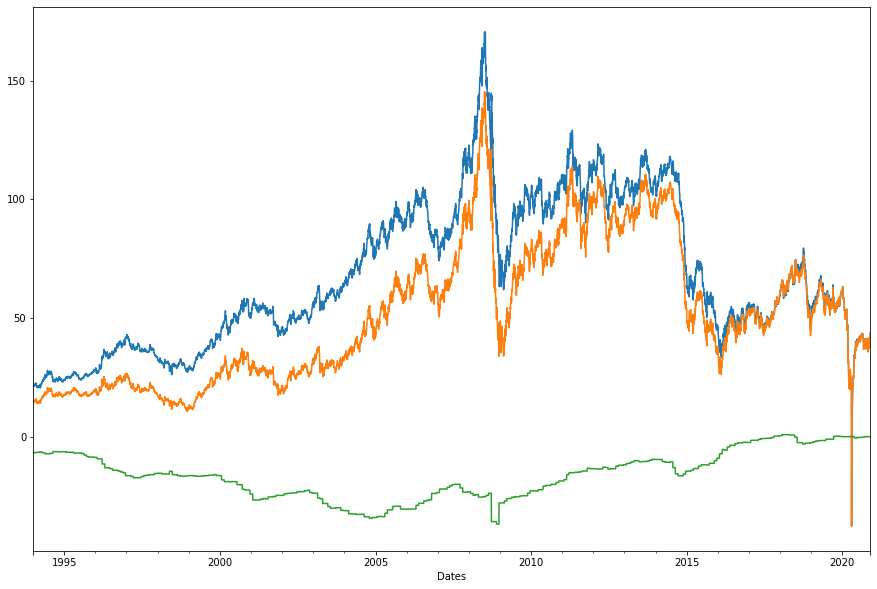

In [692]:
(futures_prices_df['PX_LAST'] - gaps).plot(figsize=(15,10))
futures_prices_df['PX_LAST'].plot()
gaps.plot()

In [ ]:
def getRolledSeries(pathIn, key):
    series=//
    series['Time'] = pd.to_datetime(series['Time'], format='%%%%')
    series=series.set_index('Time')
    gaps=rollGaps(series)
    for fld in ['Close', 'VWAP']: 
        series[fld] -= gaps
    return series

def rollGaps(series, dictio={'Instrument':'FUT_CUR_GEN_TICKER', 'Open':'PX_OPEN', 'Close':'PX_LAST'}, matchEnd=True):
    rollDates= series[dictio['Instrument']].drop_duplicates(keep='first').index
    gaps=series[dictio['Close']]*0
    iloc=list(series.index)
    iloc=[iloc.index(i)-1 for i in rollDates]
    gaps.loc[rollDates[1:]]=series[dictio['Open']].loc[rollDates[1:]] - series[dictio['Close']].iloc[iloc[1:]].values
    gaps=gaps.cumsum()
    if matchEnd:
        gaps -= gaps.iloc[-1]
    return gaps

Trading will cease at the close of business two Business Days prior to the first calendar day of the delivery month, quarter, season, or calendar.

In [591]:
nbp = pd.read_csv('./data/NBP.csv')
nbp['Dates'] = pd.to_datetime(nbp['Dates'])#, utc=True)
nbp.set_index('Dates', inplace=True)

In [592]:
nbp.head()

,PX_OPEN,PX_HIGH,PX_LOW,PX_SETTLE,PX_LAST
Dates,,,,,
2000-01-04,11.65,11.65,11.55,11.58,11.58
2000-01-05,11.48,11.50,11.45,11.50,11.50
2000-01-06,11.44,11.47,11.44,11.46,11.46
2000-01-07,11.40,11.43,11.40,11.41,11.41
2000-01-10,11.51,11.53,11.50,11.51,11.51


In [624]:

def set_target_expiry_date(price_df):
    price_series = price_df.copy()
    price_series['expiry_month'] = price_series.index.to_period('M') #price_series.index + pd.offsets.MonthBegin() 
    price_series['day'] = price_series.index.to_period('D').day
    price_series['min_day'] = final_df.groupby(by=['expiry_month'])['day'].transform(min)
    price_series['first_day_month'] = price_series['expiry_month'].astype(str) + "-" + price_series['min_day'].astype(str)
    price_series['first_day_month'] = pd.to_datetime(price_series['first_day_month'], errors='coerce')
    return price_series#.dropna()

def reduce_two_days(price_series):
    indexed_list = list(price_series.index)
    indexed_list = [indexed_list.index(i)-1 for i in price_series['first_day_month'].dropna()]
    price_series['expiry'] = price_series.iloc[indexed_list].index
    #['expiry'] - pd.tseries.offsets.BusinessDay(n = 2)
    return price_series


def is_expiry_busines_day(price_series):

    business_day = []
    for roll_date in price_series['expiry']:
        business_day.append( isbday( str(roll_date), holidays = holidays.England() ) )

    price_series['is_bday'] = business_day
    return price_series

def take_care_of_holidays(price_series):
    holiday_dates = price_series[price_series['is_bday'] == False]
    price_series['expiry'].loc[holiday_dates.index] = holiday_dates['expiry'] - pd.tseries.offsets.BusinessDay(n=2) 
    return price_series
    
final_df = set_target_expiry_date(nbp)
final_df = reduce_two_days(final_df)
final_df.loc[ final_df['expiry_month'] == final_df['expiry_month'][0], 'expiry' ] = np.nan
final_df

# final_df = is_expiry_busines_day(final_df)
# final_df = take_care_of_holidays(final_df)
# final_df





# ['is_bday'].value_counts()


# # nbp_roll_dates = (nbp.resample('M').first().index 
# # nbp_roll_dates = pd.to_datetime(nbp.resample('M').first().index, format="%Y-%m")# + pd.tseries.offsets.BusinessDay(n = 3)
# nbp_roll_dates = nbp.resample('M').first().index + pd.offsets.MonthBegin(2) - pd.tseries.offsets.BusinessDay(n = 3)
# # nbp_roll_dates = nbp.loc[nbp.index.isin(nbp_roll_dates)].index

,PX_OPEN,PX_HIGH,PX_LOW,PX_SETTLE,PX_LAST,expiry_month,day,min_day,first_day_month,expiry
Dates,,,,,,,,,,
2000-01-04,11.65,11.65,11.55,11.58,11.58,2000-01,4,4,2000-01-04,NaT
2000-01-05,11.48,11.50,11.45,11.50,11.50,2000-01,5,4,2000-01-04,NaT
2000-01-06,11.44,11.47,11.44,11.46,11.46,2000-01,6,4,2000-01-04,NaT
2000-01-07,11.40,11.43,11.40,11.41,11.41,2000-01,7,4,2000-01-04,NaT
2000-01-10,11.51,11.53,11.50,11.51,11.51,2000-01,10,4,2000-01-04,NaT
...,...,...,...,...,...,...,...,...,...,...
2020-11-19,38.50,38.51,36.62,36.84,36.84,2020-11,19,2,2020-11-02,2020-10-30
2020-11-20,36.85,36.85,35.47,36.21,36.21,2020-11,20,2,2020-11-02,2020-10-30
2020-11-23,35.12,38.62,37.50,37.97,37.97,2020-11,23,2,2020-11-02,2020-10-30


In [625]:
nbp_roll_dates = final_df['expiry'].drop_duplicates().dropna().values[:-1]
nbp_roll_dates

array(['2000-01-31T00:00:00.000000000', '2000-02-29T00:00:00.000000000',
       '2000-03-31T00:00:00.000000000', '2000-04-28T00:00:00.000000000',
       '2000-05-31T00:00:00.000000000', '2000-06-30T00:00:00.000000000',
       '2000-07-31T00:00:00.000000000', '2000-08-31T00:00:00.000000000',
       '2000-09-29T00:00:00.000000000', '2000-10-31T00:00:00.000000000',
       '2000-11-30T00:00:00.000000000', '2000-12-29T00:00:00.000000000',
       '2001-01-31T00:00:00.000000000', '2001-02-28T00:00:00.000000000',
       '2001-03-30T00:00:00.000000000', '2001-04-30T00:00:00.000000000',
       '2001-05-31T00:00:00.000000000', '2001-06-29T00:00:00.000000000',
       '2001-07-31T00:00:00.000000000', '2001-08-31T00:00:00.000000000',
       '2001-09-28T00:00:00.000000000', '2001-10-31T00:00:00.000000000',
       '2001-11-30T00:00:00.000000000', '2001-12-31T00:00:00.000000000',
       '2002-01-31T00:00:00.000000000', '2002-02-28T00:00:00.000000000',
       '2002-03-28T00:00:00.000000000', '2002-04-30

In [628]:
gaps = nbp['PX_LAST']*0
iloc=list(nbp.index)
iloc = [iloc.index(i)-1 for i in nbp_roll_dates]
gaps.loc[nbp_roll_dates] = nbp['PX_OPEN'].loc[nbp_roll_dates] - nbp['PX_LAST'].iloc[iloc].values

gaps = gaps.cumsum().dropna()

gaps -= gaps.iloc[-1]



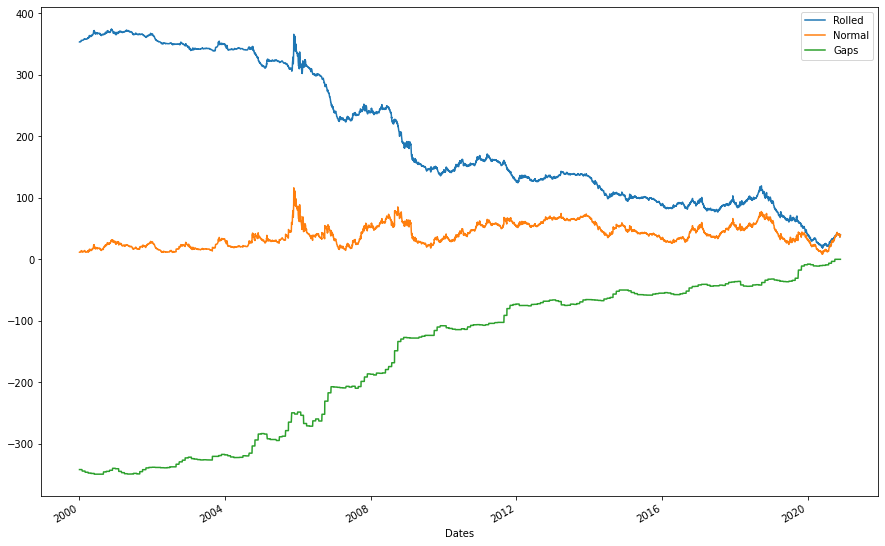

In [629]:

(nbp['PX_LAST'] - gaps).plot(figsize=(15,10))
nbp['PX_LAST'].plot()
gaps.plot()

plt.legend(["Rolled", "Normal", "Gaps"])